# Alzheimer-Classification-Prediction

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn import tree
from matplotlib.colors import ListedColormap


## Load Dataset

- Group --> Class
(Demented - not able to think clearly,
Non demented - able to think clearly,
Converted - conversion from mild cognitive impairment to alzheimer)
- Age --> Age
- EDUC --> Years of Education
- SES --> Socioeconomic Status / 1-5
- MMSE --> Mini Mental State Examination
- CDR --> Clinical Dementia Rating
- eTIV --> Estimated total intracranial volume
- nWBV --> Normalize Whole Brain Volume
- ASF --> Atlas Scaling Factor

In [ ]:
AlzheimerData = pd.read_csv("./alzheimer.csv")
data = AlzheimerData.copy() # for VISUALIZATION
data["Group"] = pd.Categorical(data["Group"])
data["M/F"] = pd.Categorical(data["M/F"])
data["SES"] = pd.Categorical(data["SES"])
data["CDR"] = pd.Categorical(data["CDR"])
data["EDUC"] = pd.Categorical(data["EDUC"])
data["Age"] = pd.Categorical(data["Age"])

df = data.select_dtypes(include=["float64","int64","int32"])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4d7a397a50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4d7a397a50>)

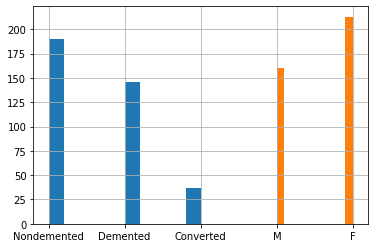

In [ ]:
data["Group"].hist(), data["M/F"].hist()

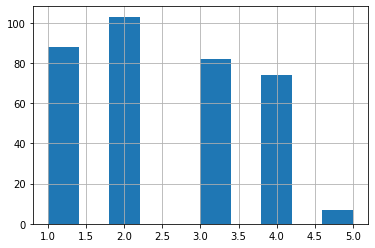

In [ ]:
data["SES"].hist()

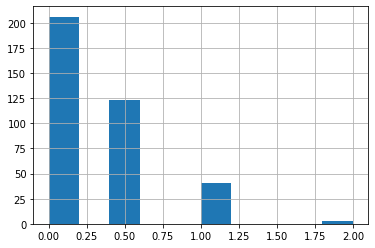

In [ ]:
data["CDR"].hist()

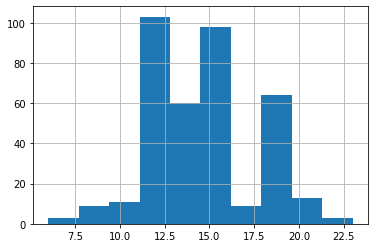

In [ ]:
data["EDUC"].hist()

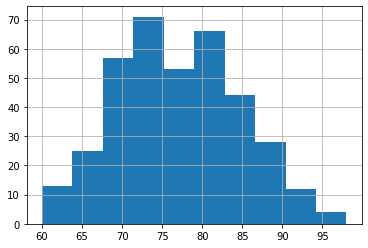

In [ ]:
data["Age"].hist()

In [ ]:
df

,MMSE,eTIV,nWBV,ASF
0,27.0,1987,0.696,0.883
1,30.0,2004,0.681,0.876
2,23.0,1678,0.736,1.046
3,28.0,1738,0.713,1.010
4,22.0,1698,0.701,1.034
...,...,...,...,...
368,28.0,1693,0.694,1.037
369,26.0,1688,0.675,1.040
370,30.0,1319,0.801,1.331
371,30.0,1327,0.796,1.323


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


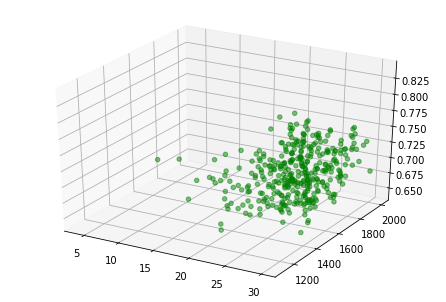

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
fig.add_axes(ax)
ax.scatter(data["MMSE"], data["eTIV"], data["nWBV"], c="green", s=20, alpha=0.5)
plt.show()

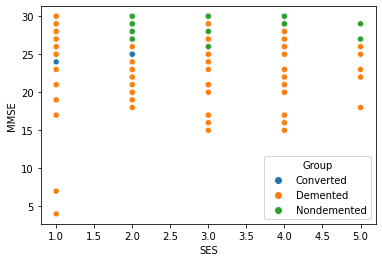

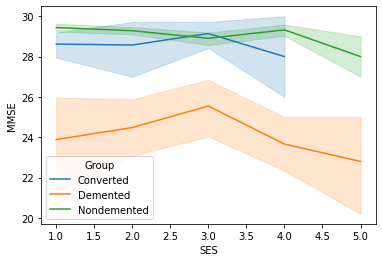

In [ ]:
sns.scatterplot(x="SES",y="MMSE",hue="Group",data=data)
plt.show()
sns.lineplot(x="SES", y="MMSE",hue="Group", data=data)
plt.show()

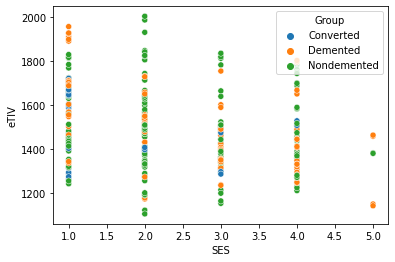

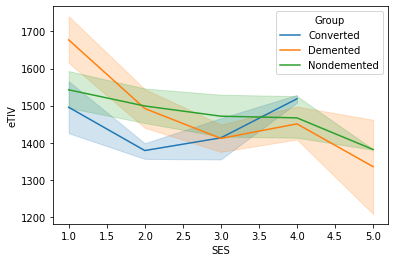

In [ ]:
sns.scatterplot(x="SES",y="eTIV",hue="Group",data=data)
plt.show()
sns.lineplot(x="SES",y="eTIV",hue="Group",data=data)
plt.show()

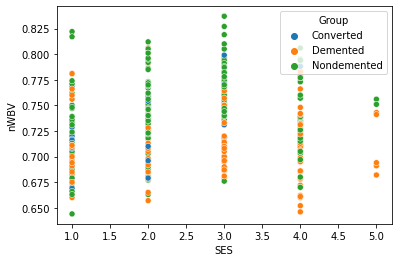

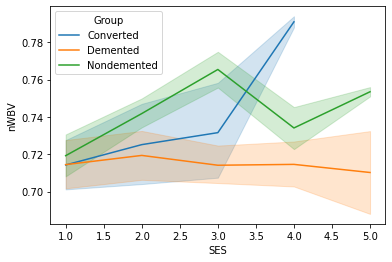

In [ ]:
sns.scatterplot(x="SES",y="nWBV",hue="Group",data=data)
plt.show()
sns.lineplot(x="SES",y="nWBV",hue="Group",data=data)
plt.show()

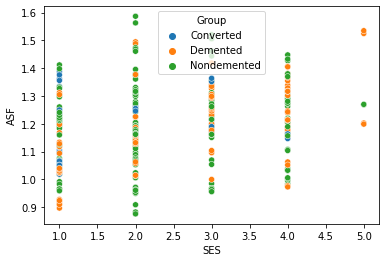

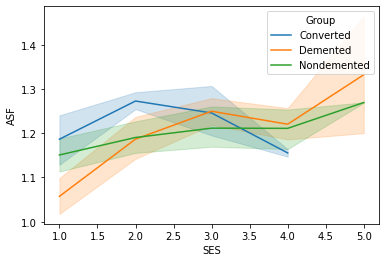

In [ ]:
sns.scatterplot(x="SES",y="ASF",hue="Group",data=data)
plt.show()
sns.lineplot(x="SES",y="ASF",hue="Group",data=data)
plt.show()

## Data Preprocessing

In [ ]:
Columns = ["Group","M/F"]
le = LabelEncoder()

for i in Columns:
    print()
    print(data[i].value_counts())
    print("----"*5)
    data[i] = le.fit_transform(data[i])
    print(data[i].value_counts())
    print("----"*15)


Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64
--------------------
2    190
1    146
0     37
Name: Group, dtype: int64
------------------------------------------------------------

F    213
M    160
Name: M/F, dtype: int64
--------------------
0    213
1    160
Name: M/F, dtype: int64
------------------------------------------------------------


# 
### Group
- Converted (0)
- Demented (1)
- Nondemented (2)

### M/F
- F (0)
- M (1)

In [ ]:
data

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,2,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,2,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
# changing categorical columns to numerics and decimals
 
data["SES"] = AlzheimerData["SES"]
data["CDR"] = AlzheimerData["CDR"]
data["EDUC"] = AlzheimerData["EDUC"]
data["Age"] = AlzheimerData["Age"]

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    int64  
 1   M/F     373 non-null    int64  
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 29.3 KB
None


#### Missing Values

In [ ]:
data["SES"].fillna(data["SES"].mean(), inplace=True)
data["MMSE"].fillna(data["MMSE"].mean(), inplace=True)
print(data.isnull().sum())

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    int64  
 1   M/F     373 non-null    int64  
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     373 non-null    float64
 5   MMSE    373 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 29.3 KB
None


In [ ]:
data

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,2,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,1,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,1,1,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,2,0,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,2,0,63,13,2.000000,30.0,0.0,1327,0.796,1.323


## Split the dataset into training and test

In [ ]:
x = data.drop("Group",axis=1)
y = data["Group"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape

(298, 9)

In [ ]:
X_test.shape

(75, 9)

## KNN MODELS & ERROR & TUNING & PREDICT

In [ ]:
kn = KNeighborsClassifier().fit(X_train,y_train)
kn

KNeighborsClassifier()

In [ ]:
predict = kn.predict(X_test)
predict

array([2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 2, 1, 2, 1, 0])

In [ ]:
# accuracy score
accuracy_score(y_test, predict)

0.6266666666666667

In [ ]:
# cross validation scores
cvs = cross_val_score(kn, X_test, y_test, cv=10)
cvs

array([0.25      , 0.375     , 0.625     , 0.375     , 0.25      ,
       0.71428571, 0.28571429, 0.14285714, 0.71428571, 0.57142857])

In [ ]:
R2CV = cvs.mean()
R2CV

0.4303571428571429

In [ ]:
# Mean Squared Error
mse = mean_squared_error(y_test, predict)
mse

0.5733333333333334

In [ ]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
rmse

0.7571877794400365

In [ ]:
# changing parameters
kntuned = KNeighborsClassifier(p=2, n_neighbors=1).fit(X_train, y_train)
kntuned

KNeighborsClassifier(n_neighbors=1)

In [ ]:
predict_tuned = kntuned.predict(X_test)
predict_tuned

array([2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1,
       2, 2, 1, 0, 1, 1, 2, 2, 0])

In [ ]:
# accuracy score
accuracy_score(y_test, predict_tuned)

0.6533333333333333

In [ ]:
# cross validation score
cvs = cross_val_score(kntuned, X_test, y_test, cv=10)
cvs

array([0.5       , 0.25      , 0.5       , 0.5       , 0.25      ,
       0.57142857, 0.71428571, 0.57142857, 0.57142857, 0.71428571])

In [ ]:
R2CV = cvs.mean()
R2CV

0.5142857142857142

In [ ]:
# Mean Squared Error
mse = mean_squared_error(y_test, predict_tuned)
mse

0.7066666666666667

In [ ]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
rmse

0.8406346808612327

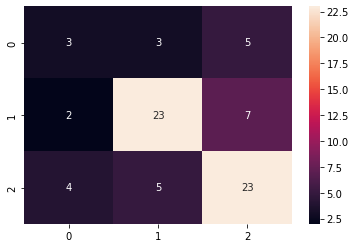

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, predict_tuned)
sns.heatmap(cm, annot=True)

In [ ]:
# classification report
print(classification_report(y_test, predict_tuned))

              precision    recall  f1-score   support

           0       0.33      0.27      0.30        11
           1       0.74      0.72      0.73        32
           2       0.66      0.72      0.69        32

    accuracy                           0.65        75
   macro avg       0.58      0.57      0.57        75
weighted avg       0.65      0.65      0.65        75



## Decision Tree Classifier(CART) Model Predict, Error & Tuning

In [ ]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
dtc

DecisionTreeClassifier()

In [ ]:
predict = dtc.predict(X_test)
predict

array([1, 0, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 2, 2, 2])

In [ ]:
# accuracy score
accuracy_score(y_test, predict)

0.84

In [ ]:
# cross validation score
cvs = cross_val_score(dtc, X_test, y_test, cv=10)
cvs

array([0.875     , 0.625     , 0.75      , 0.75      , 0.875     ,
       0.71428571, 0.85714286, 0.71428571, 0.85714286, 0.85714286])

In [ ]:
R2CV = cvs.mean()
R2CV

0.7874999999999999

In [ ]:
# Mean Squared Error
mse = mean_squared_error(y_test, predict)
mse

0.44

In [ ]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
rmse

0.6633249580710799

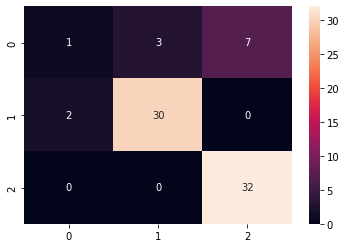

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True)

In [ ]:
# classification report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.33      0.09      0.14        11
           1       0.91      0.94      0.92        32
           2       0.82      1.00      0.90        32

    accuracy                           0.84        75
   macro avg       0.69      0.68      0.66        75
weighted avg       0.79      0.84      0.80        75



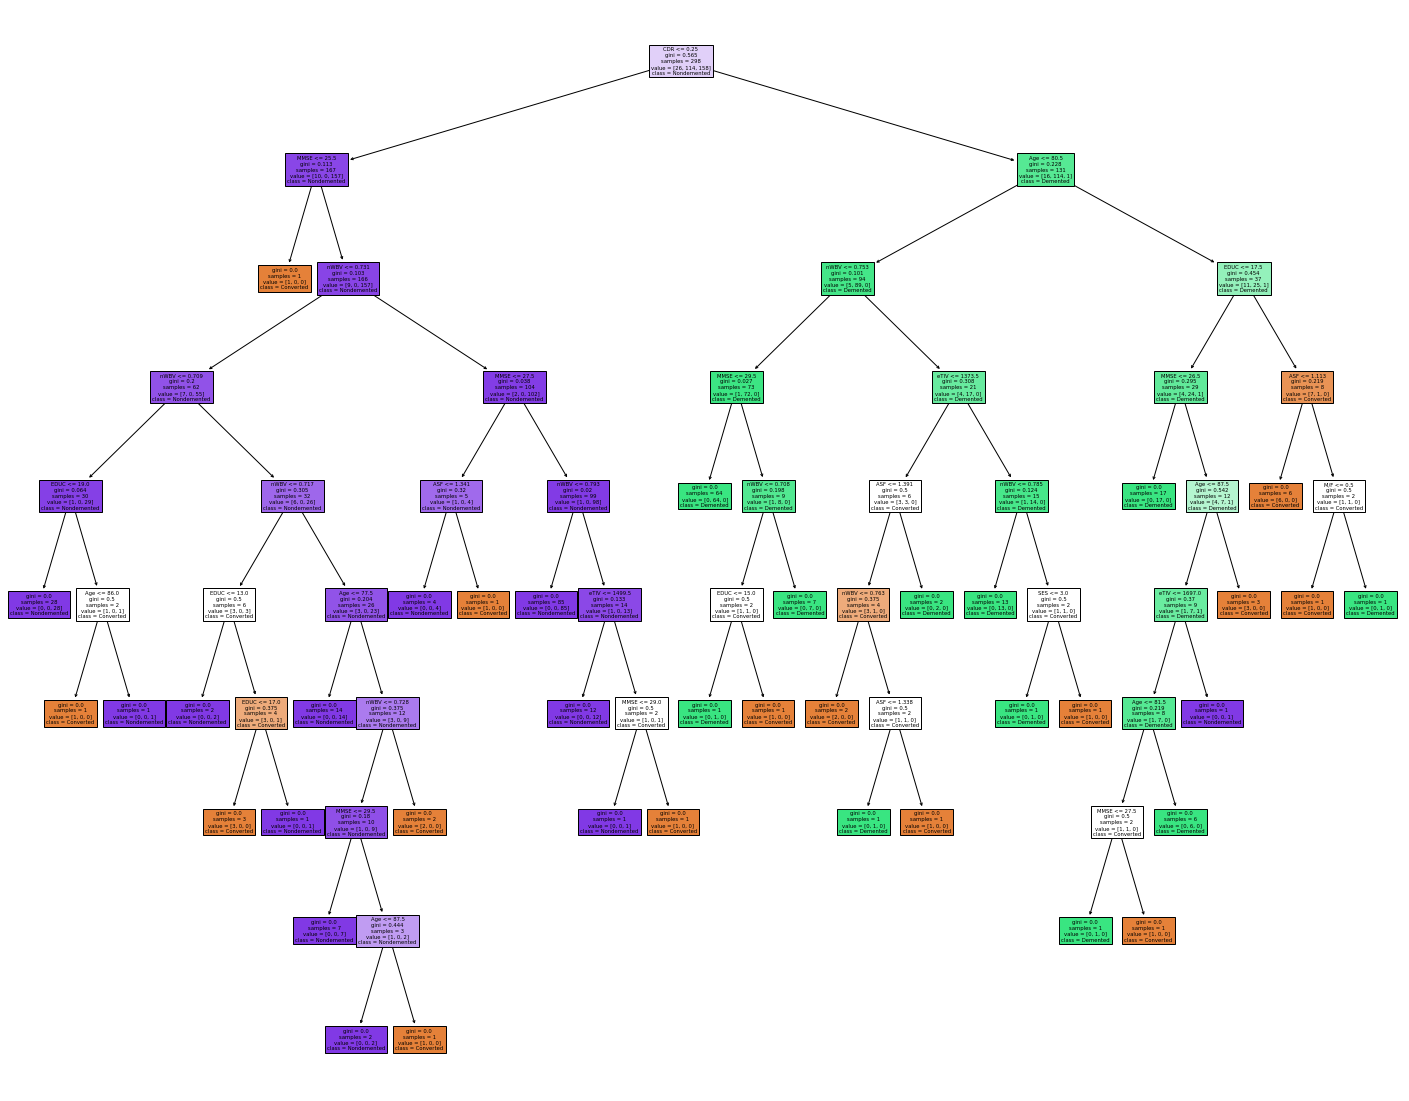

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc,
                   feature_names=["M/F", "Age", "EDUC", "SES", "MMSE", "CDR", "eTIV", "nWBV", "ASF"],  
                   class_names=["Converted", "Demented", "Nondemented"],
                   filled=True)

# XGBoost Classifier Model Train, Predict, Error and Tuning

In [ ]:
xgbc = XGBClassifier(verbose=False).fit(X_train,y_train)
xgbc

XGBClassifier(objective='multi:softprob', verbose=False)

In [ ]:
predict = xgbc.predict(X_test)
predict

array([1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 2, 2, 2])

In [ ]:
# accuracy score
accuracy_score(y_test, predict)

0.8533333333333334

In [ ]:
# cross validation score
cvs = cross_val_score(xgbc, X_test, y_test, cv=10)
cvs

array([0.875     , 0.75      , 0.75      , 0.875     , 0.75      ,
       0.85714286, 1.        , 0.71428571, 0.85714286, 0.85714286])

In [ ]:
R2CV = cvs.mean()
R2CV

0.8285714285714285

In [ ]:
# Mean Squared Error
mse = mean_squared_error(y_test, predict)
mse

0.4266666666666667

In [ ]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
rmse

0.6531972647421809

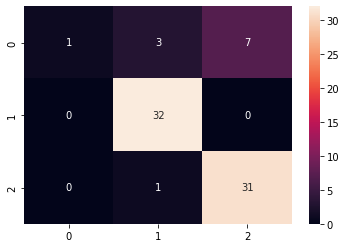

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True)

In [ ]:
# classification report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.89      1.00      0.94        32
           2       0.82      0.97      0.89        32

    accuracy                           0.85        75
   macro avg       0.90      0.69      0.66        75
weighted avg       0.87      0.85      0.80        75



In [ ]:
xgbctuned = XGBClassifier(learning_rate=0.02, max_depth=20, min_samples_split=3, n_estimators=300, subsample=0.8).fit(X_train, y_train)
xgbctuned

XGBClassifier(learning_rate=0.02, max_depth=20, min_samples_split=3,
              n_estimators=300, objective='multi:softprob', subsample=0.8)

In [ ]:
predict_tuned = xgbctuned.predict(X_test)
predict_tuned

array([1, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 2, 2, 2])

In [ ]:
# accuracy score
accuracy_score(y_test, predict_tuned)

0.8533333333333334

In [ ]:
# cross validation score
cvs = cross_val_score(xgbctuned, X_test, y_test, cv=10)
cvs

array([0.875     , 0.75      , 0.75      , 0.875     , 0.875     ,
       0.85714286, 1.        , 0.71428571, 0.85714286, 0.85714286])

In [ ]:
R2CV = cvs.mean()
R2CV

0.8410714285714285

In [ ]:
# Mean Squared Error
mse = mean_squared_error(y_test, predict_tuned)
mse

0.38666666666666666

In [ ]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
rmse

0.621825270205921

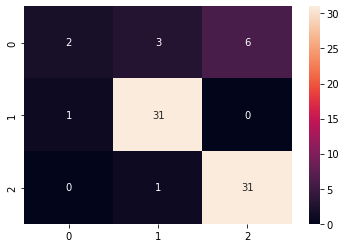

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, predict_tuned)
sns.heatmap(cm, annot=True)

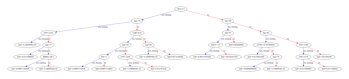

In [ ]:
plot_tree(xgbctuned)
plt.show()

In [ ]:
# classification report
print(classification_report(y_test, predict_tuned))

              precision    recall  f1-score   support

           0       0.67      0.18      0.29        11
           1       0.89      0.97      0.93        32
           2       0.84      0.97      0.90        32

    accuracy                           0.85        75
   macro avg       0.80      0.71      0.70        75
weighted avg       0.83      0.85      0.82        75



# Comparision of Classification Models

----------------------------------------

KNeighborsClassifier: 
Accuracy: 0.6533333333333333
RMSE: 0.8406346808612327
----------------------------------------

DecisionTreeClassifier: 
Accuracy: 0.8533333333333334
RMSE: 0.6531972647421809
----------------------------------------

XGBClassifier: 
Accuracy: 0.8533333333333334
RMSE: 0.621825270205921
----------------------------------------



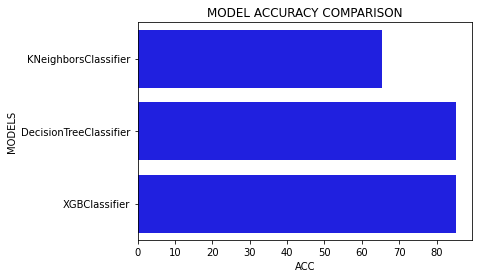

In [ ]:
models = [kntuned, dtc, xgbctuned]
r = pd.DataFrame(columns=["MODELS","ACC"])

print("-" * 40 + "\n")
for model in models:
    name = model.__class__.__name__
    predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, predict)
    mse = mean_squared_error(y_test, predict)
    rmse = np.sqrt(mse)
    print(name + ": ")
    print(f"Accuracy: {accuracy}")
    print(f"RMSE: {rmse}")
    print("-" * 40 + "\n")
    result = pd.DataFrame([[name,accuracy*100]],columns=["MODELS","ACC"])
    r = r.append(result)
    
sns.barplot(x="ACC",y="MODELS",data=r,color="blue")
plt.xlabel("ACC")
plt.title("MODEL ACCURACY COMPARISON")
plt.show()